# Diabetes Milletus Prediction

## Data Pre-processing

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the Dataset

In [2]:
dataset= pd.read_csv('diabetes.csv')
dataset

,preg,plas,pres,Skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
dataset.tail()

,preg,plas,pres,Skin,test,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### Taking Care of missing Data

In [4]:
dataset.isnull().any()

preg     False
 plas    False
pres     False
Skin     False
test     False
mass     False
pedi     False
age      False
class    False
dtype: bool

In [5]:
### no need to use one hot encoder or label encoder as all our data is in int format and there is no string column

### Splitting Dataset into Independent variable and Dependent variable 

In [6]:
x= dataset.iloc[:,0:8].values

In [7]:
y= dataset.iloc[:,8].values

### Data Visualization

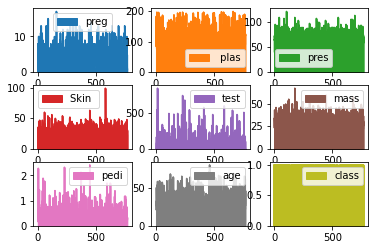

In [8]:
dataset.plot(kind='area', subplots=True, layout=(3,3), sharex=False)
plt.show()

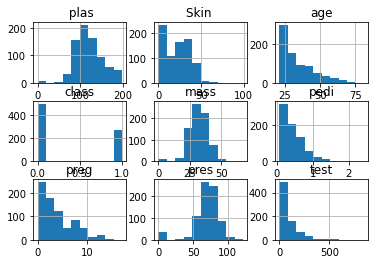

In [9]:
dataset.hist()
plt.show()

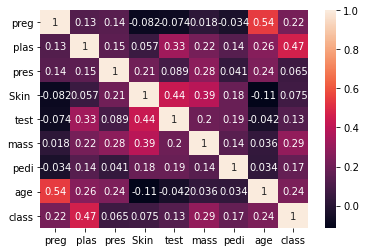

In [10]:
dataset.corr()
import seaborn as sns
sns.heatmap(dataset.corr(),annot=True)

### Splitting The dataset in to Train set and Testing set

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### Scaling the Features

In [12]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

## Model Building

### Training and testing the model

In [13]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor(random_state=0)
dt.fit(x_train,y_train)
y_predict= dt.predict(x_test)

### We can also do this using pipeline function , using it we can do both feature scaling and model building  in a single step.

In [14]:
from sklearn.metrics import roc_auc_score
print('roc_auc_score:', roc_auc_score(y_test, y_predict))

roc_auc_score: 0.7848478822827599


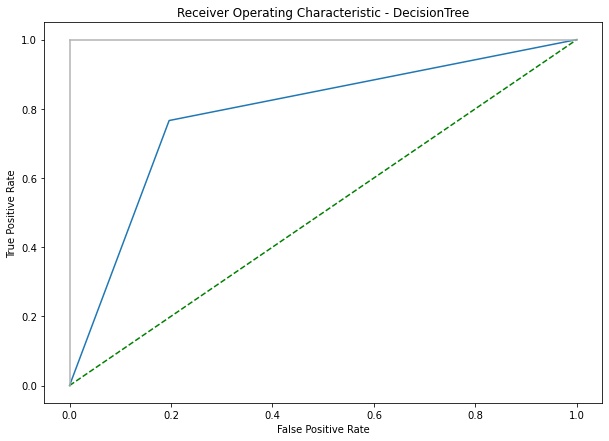

In [15]:
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(y_test, y_predict)
plt.subplots(1, figsize=(10,7))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(fpr, tpr)
plt.plot([0, 1], linestyle="--",color = 'g')
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [16]:
import pickle
pickle.dump(dt,open('outcome.pkl','wb'))
model=pickle.load(open('outcome.pkl','rb'))